Accuracy: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1343
           1       0.99      0.98      0.99      1600
           2       0.93      0.98      0.95      1380
           3       0.94      0.95      0.95      1433
           4       0.96      0.97      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.99      0.98      0.98      1396
           7       0.98      0.97      0.97      1503
           8       0.96      0.95      0.95      1357
           9       0.96      0.94      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000



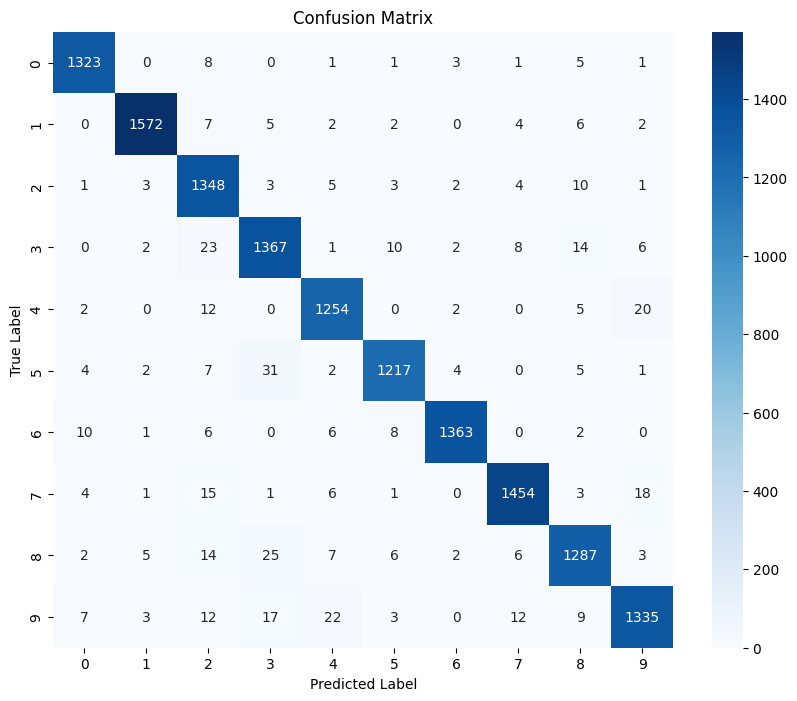

Visualizing predictions...


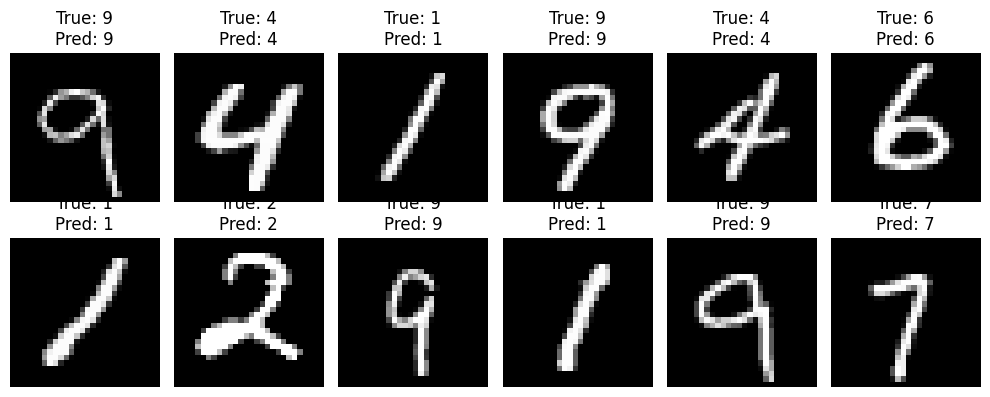

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data / 255.0, mnist.target.astype(int)  # Normalize features and convert labels to integers

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reset indices of the test set to ensure alignment
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

# Train an SVM classifier
svm = SVC(kernel='rbf', C=10, gamma=0.05, random_state=42)
svm.fit(X_train[:10000], y_train[:10000])  # Training on a subset for efficiency

# Predict and evaluate
y_pred = svm.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# Visualize Predictions
def visualize_predictions(X_test, y_test, y_pred, n_samples=12):
    plt.figure(figsize=(10, 4))
    indices = np.random.choice(len(X_test), n_samples, replace=False)  # Generate random indices
    for i, idx in enumerate(indices):
        plt.subplot(2, n_samples // 2, i + 1)
        plt.imshow(X_test.iloc[idx].values.reshape(28, 28), cmap='gray')  # Use .iloc for Pandas DataFrame
        plt.title(f"True: {y_test[idx]}\nPred: {y_pred[idx]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

print("Visualizing predictions...")
visualize_predictions(X_test, y_test, y_pred)


Loading MNIST dataset...
Dataset Structure:
Total Samples: 70000
Feature Dimension (flattened images): 784 (28x28 pixels = 784 features)
Number of Classes (digits): 10

Sample Feature Data (X):
   pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  pixel9  \
0       0       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       0       0       0       0       0       0       0       0       0   
3       0       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   

   pixel10  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0        0  ...         0         0         0         0         0         0   
1        0  ...         0         0         0         0         0         0   
2        0  ...         0         0         0         0         0         0   
3        0  ...         0  

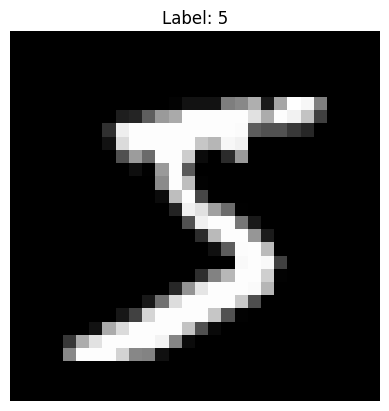

In [7]:
from sklearn.datasets import fetch_openml
import pandas as pd

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)

# Features (X) and Labels (y)
X, y = mnist.data, mnist.target.astype(int)  # Convert labels to integers

# Display structure information
print("Dataset Structure:")
print(f"Total Samples: {X.shape[0]}")
print(f"Feature Dimension (flattened images): {X.shape[1]} (28x28 pixels = 784 features)")
print(f"Number of Classes (digits): {len(y.unique())}")

# View first few rows of X and y
print("\nSample Feature Data (X):")
print(pd.DataFrame(X).head())  # Convert to DataFrame for better display

print("\nSample Labels (y):")
print(pd.Series(y).head())  # Convert to Series for better display

# Check the unique class labels
print("\nUnique Labels in Dataset:", y.unique())

# Display an example row (features of the first sample)
print("\nExample Row of Feature Data (flattened 28x28 image):")
print(X.iloc[0].values)

# Visualize the example as an image
import matplotlib.pyplot as plt

def visualize_sample(X, y, index=0):
    plt.imshow(X.iloc[index].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y.iloc[index]}")
    plt.axis('off')
    plt.show()

print("\nVisualizing the first sample...")
visualize_sample(X, y)


Displaying sample images from the MNIST dataset...


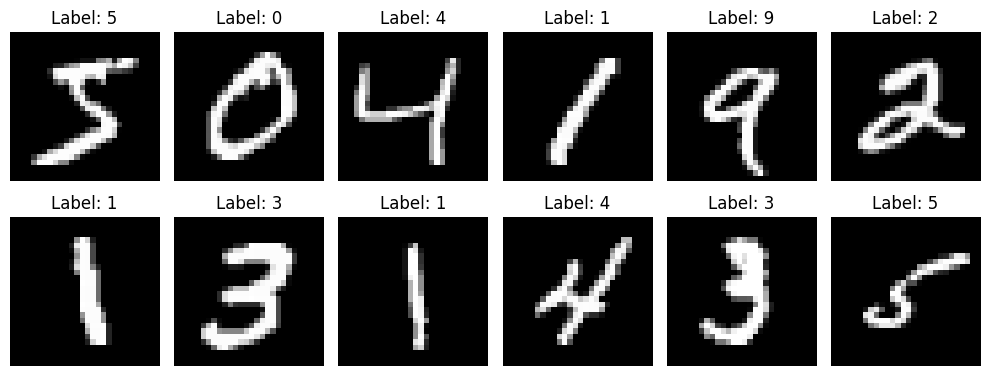

In [8]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np

# Load MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)  # Normalize pixel values and convert labels to integers

# Function to display sample images from the MNIST dataset
def display_mnist_samples(X, y, num_samples=12):
    plt.figure(figsize=(10, 4))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
        plt.title(f"Label: {y.iloc[i]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display sample images
print("Displaying sample images from the MNIST dataset...")
display_mnist_samples(X, y)
